# Analyse Continous Model #

In [75]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np

import sys
sys.path.append('../qubo')

## Collect total delay data ##

In [92]:
pmin = 0
pmax = 45
maxDelaysList = range(1, 36 + 1)
totaldelays = {}

numFlights = {}
numConflicts = {}
for partition in range(pmin, pmax + 1):
    # get number of flights and conflicts
    instancefile = '../data/instances/atm_instance_partition%04i_delayStep%03i_maxDelay%03i.h5' % (partition, 9, 18)
    f = h5py.File(instancefile, 'r')
    numFlights[partition] = f['atm-instance'].attrs['Number of flights']
    numConflicts[partition] = f['atm-instance'].attrs['Number of conflicts']
    f.close()
    resultfile = '../data/results/atm_instance_partition%04i.results.h5' % partition

    f = h5py.File(resultfile, 'r')
    td = []
    md = []
    for maxDelay in maxDelaysList:
        groupname = "solution_constraint_programming_numDelays%03i_maxDelay%03i" % (0, maxDelay)
        if groupname in f:
            g = f[groupname]
            if 'total delay' in g.attrs.keys():
                td.append(g.attrs['total delay'])
                md.append(maxDelay)
    if not all(np.array(td) == 0):
        totaldelays[partition] = (md, td)
    f.close()      

## Plot total delay of solution versus maximum delay ##

In [93]:
%matplotlib inline

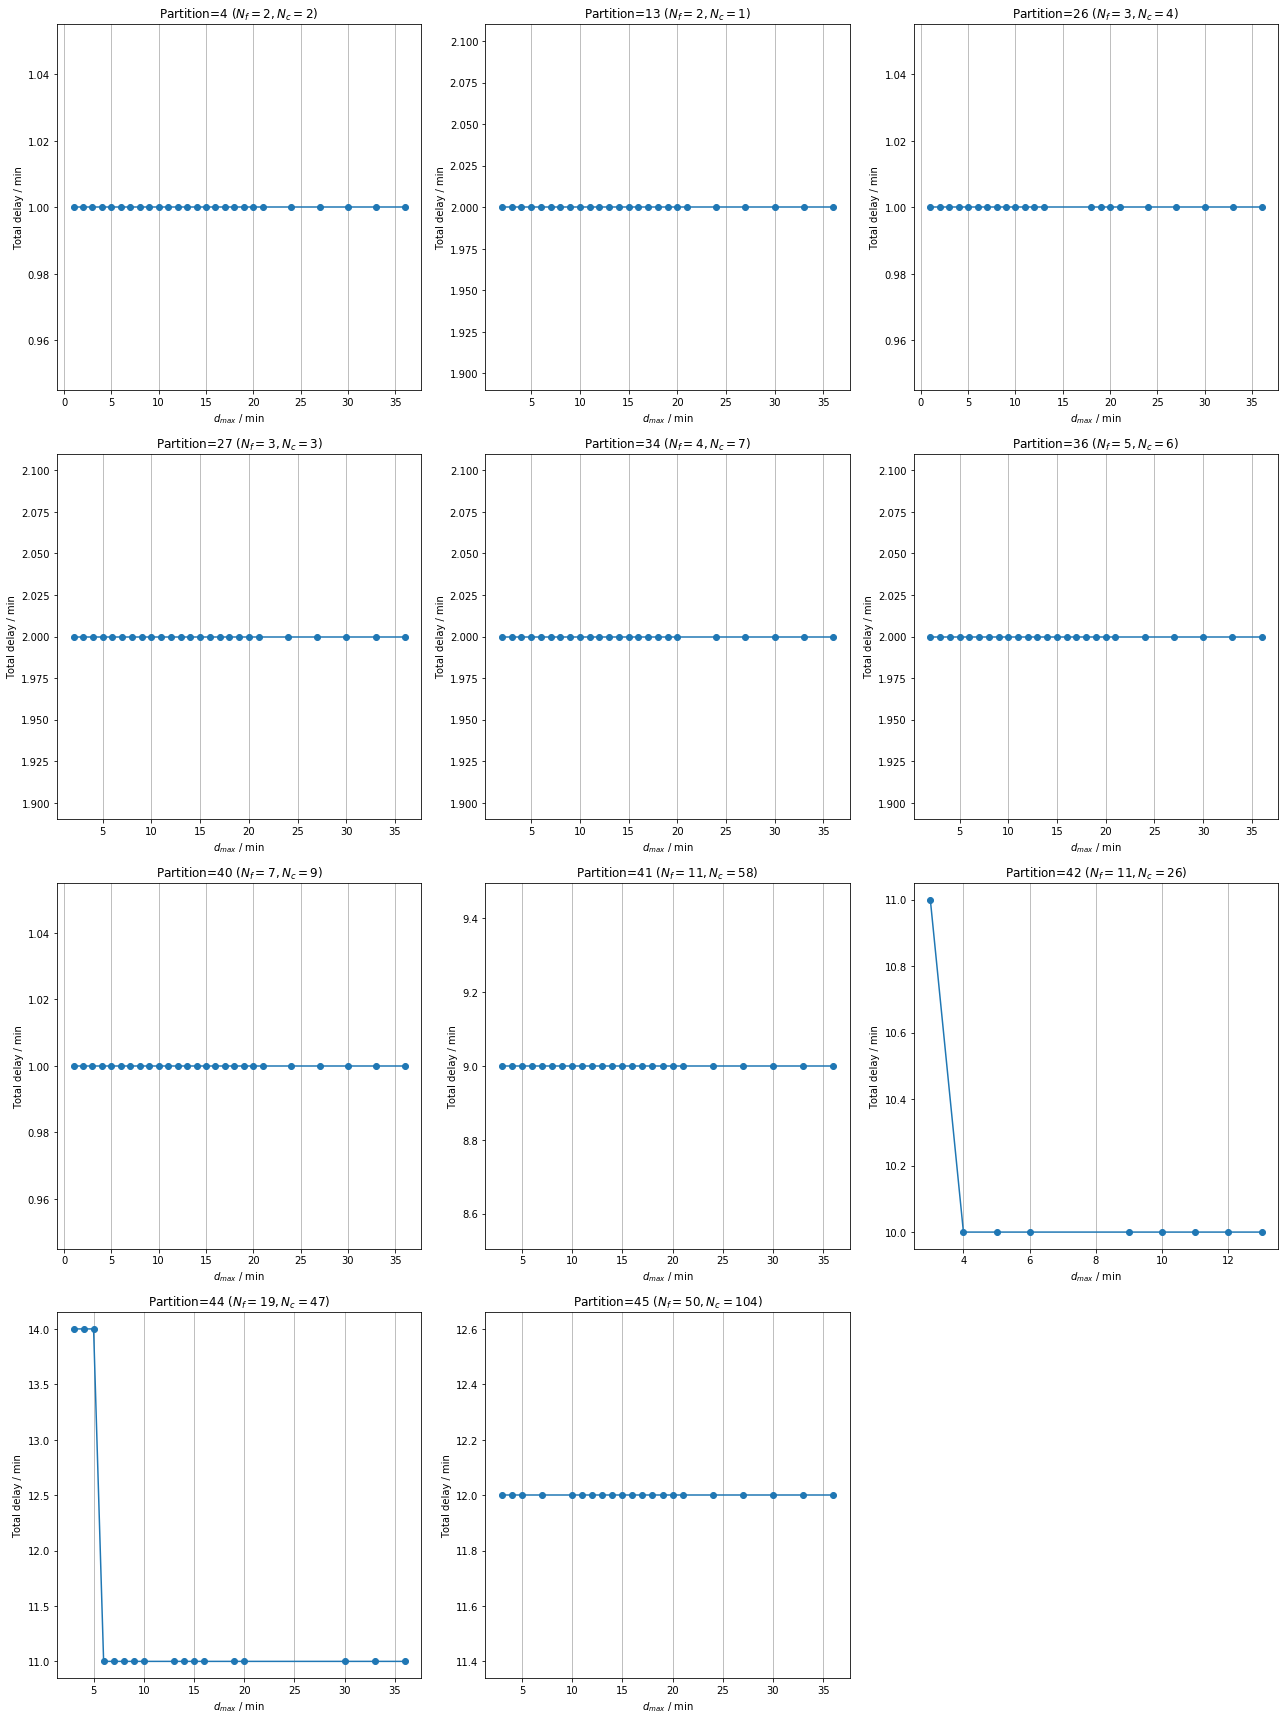

In [94]:
ncol = 3
Np = len(totaldelays.keys())
nrow = Np / ncol + (Np % ncol != 0)
fig = plt.figure(figsize=(6 * ncol, 6 * nrow))
n = 0
for partition in sorted(totaldelays.keys()):
    ax = fig.add_subplot(nrow, ncol, n + 1)
    td = totaldelays[partition]
    ax.plot(td[0], td[1], 'o-')
    ax.legend(loc='upper right')
    ax.grid(axis='x')
    ax.set_xlabel('$d_{max}$ / min')
    ax.set_ylabel('Total delay / min')
    ax.set_title('Partition=%i ($N_f=%i, N_c=%i$)' % (partition, numFlights[partition], numConflicts[partition]))

    n = n + 1
plt.tight_layout()


## Save plots to PDF file ##

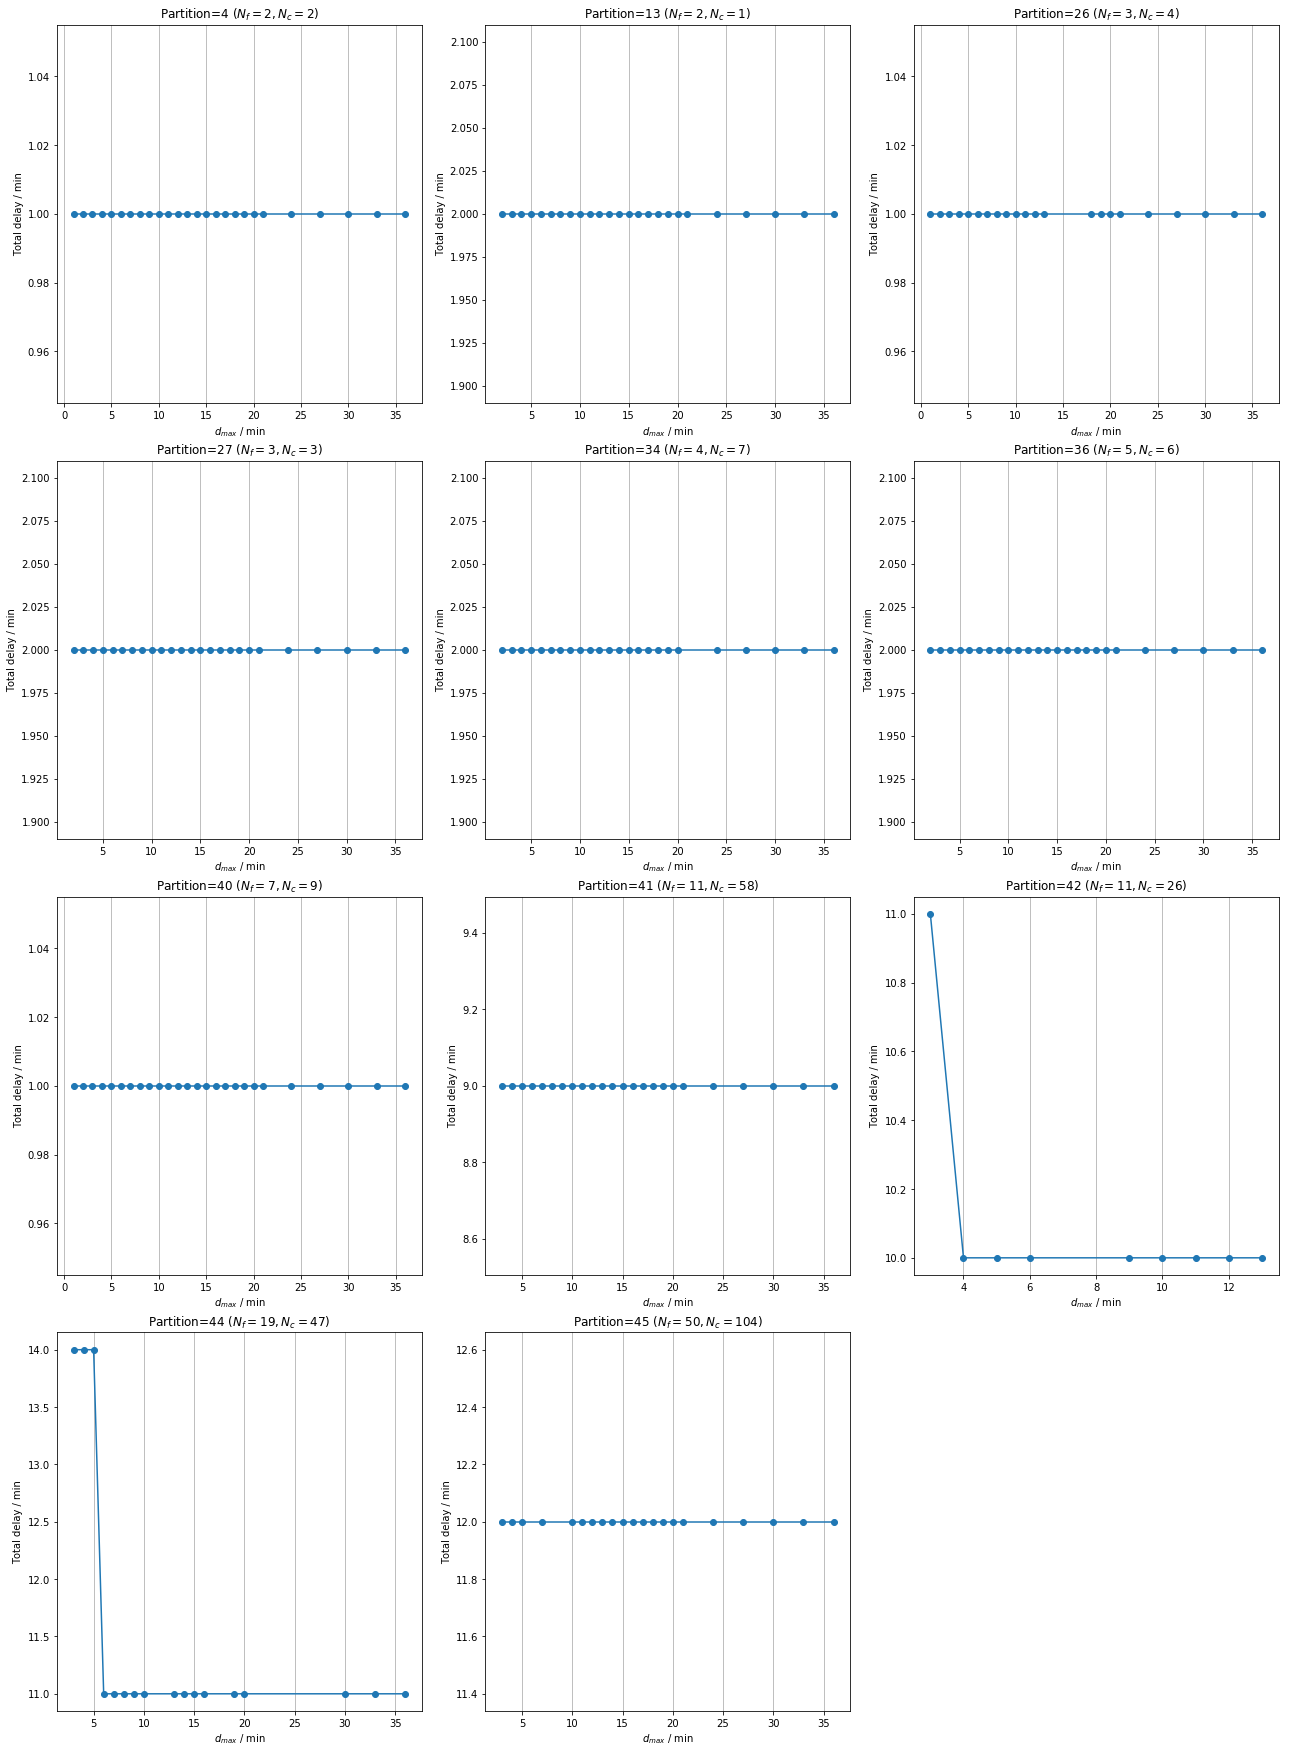

In [91]:
nperpage = 5

ncol = 3
Np = len(totaldelays.keys())
nrow = Np / ncol + (Np % ncol != 0)
pdf = matplotlib.backends.backend_pdf.PdfPages('totalDelayVsMaxDelayContinuous.pdf');
n = 0
for partition in sorted(totaldelays.keys()):
    if n % (ncol * nperpage) == 0:
        fig = plt.figure(figsize=(6 * ncol, 6 * nperpage));

    ax = fig.add_subplot(nperpage, ncol, n % (ncol * nperpage) + 1)
    td = totaldelays[partition]
    ax.plot(td[0], td[1], 'o-')
    ax.legend(loc='upper right')
    ax.grid(axis='x')
    ax.set_xlabel('$d_{max}$ / min')
    ax.set_ylabel('Total delay / min')
    ax.set_title('Partition=%i ($N_f=%i, N_c=%i$)' % (partition, numFlights[partition], numConflicts[partition]))
    
    if n % (ncol * nperpage) == ncol * nperpage - 1:
        pdf.savefig(figure=fig);
    n = n + 1
pdf.savefig(figure=fig);
pdf.close();
plt.tight_layout()

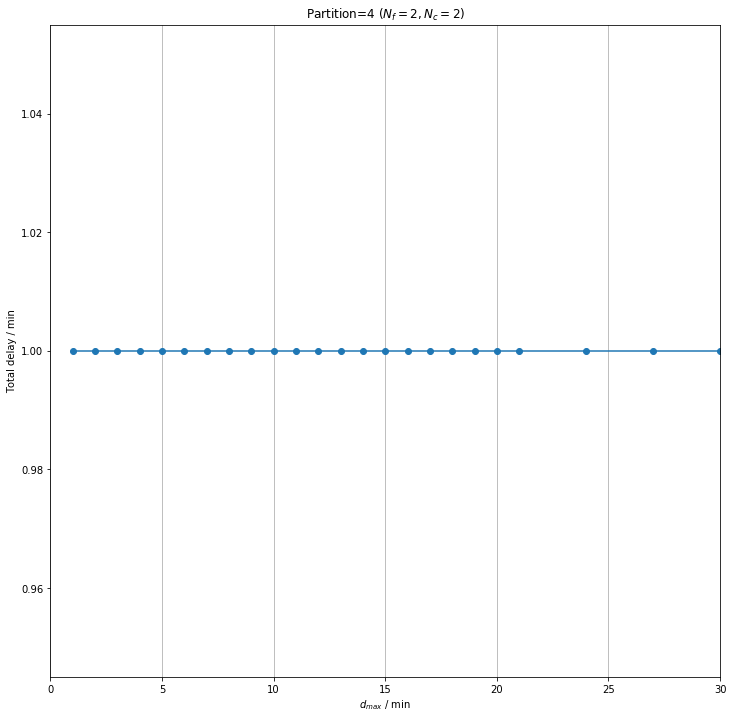

In [66]:

fig = plt.figure(figsize=(12 , 12))
partition = 4
ax = fig.add_subplot(1, 1, 1)
td = totaldelays[partition]
ax.plot(td[0], td[1], 'o-')
ax.legend(loc='upper right')
ax.grid(axis='x')
ax.set_xlabel('$d_{max}$ / min')
ax.set_ylabel('Total delay / min')
ax.set_title('Partition=%i ($N_f=%i, N_c=%i$)' % (partition, numFlights[partition], numConflicts[partition]))
ax.set_xlim(0,30)
plt.show()